In [250]:
from autograd import engine as e
from autograd import nn
import numpy as np
import importlib
importlib.reload(e)
importlib.reload(nn)

<module 'autograd.nn' from '/Users/lucasvilsen/Desktop/RandomProjects/backpropagation/autograd/nn.py'>

In [251]:
x1 = e.Tensor(2.0)
x2 = e.Tensor(0.0)

w1 = e.Tensor(-3.0)
w2 = e.Tensor(1.0)

b = e.Tensor(6.881373587)

n = (x1 * w1) + (x2 * w2) + b
o = n.tanh()
n, o

(Tensor(data=0.8813735869999997), Tensor(data=0.7071067811767758))

In [252]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

In [253]:
importlib.reload(e)
importlib.reload(nn)
loss_func = nn.MSELoss()
lr = 0.05
steps = 500
n = nn.Perceptron(3, [4, 4, 1])

In [254]:
ks = []
losses = []

for k in range(steps):
  # forward
  ypred = [n(x) for x in xs]
  loss = loss_func(ypred, ys)

  # backward
  n.zero_grad()
  loss.backward()
  
  # update
  for p in n.parameters(): p.data += -lr * p.grad
  
  # plot
  ks.append(k)
  losses.append(loss.item())

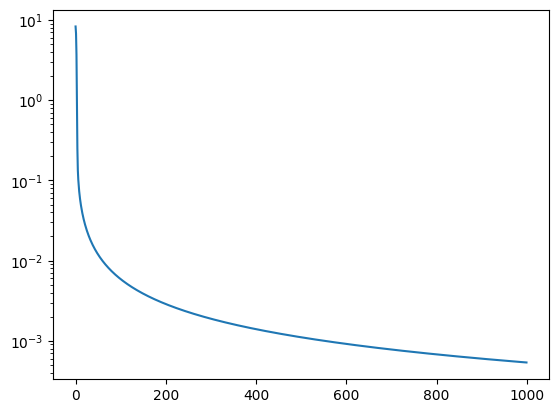

In [255]:
import matplotlib.pyplot as plt

plt.semilogy(ks, losses)